In [2494]:
#import warnings 
#warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline  
 

In [2495]:
#import os
#os.getcwd()

In [2496]:
#os.chdir("G:\\Project")

In [2497]:

df = pd.read_csv('C:/Users/Dell/Downloads/train_u6lujuX_CVtuZ9i.csv')


In [2498]:
df_test= pd.read_csv('C:/Users/Dell/Downloads/test_Y3wMUE5_7gLdaTN.csv')

In [2499]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


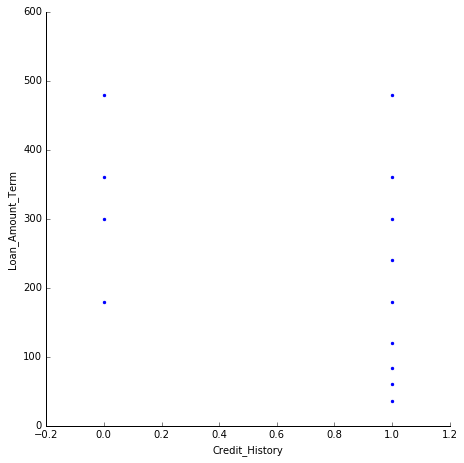

In [2500]:
sns.pairplot( df,y_vars='Loan_Amount_Term',x_vars='Credit_History',size=6.5)

In [2501]:
df.info()
type(df)
corr = df.corr()
corr.style.background_gradient()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


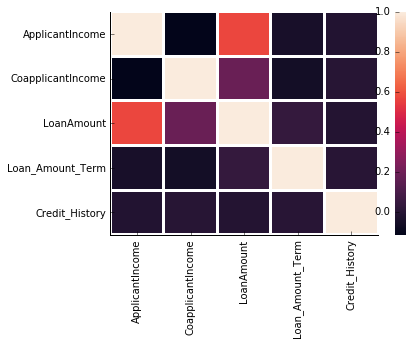

In [2502]:
sns.heatmap(corr, robust = 1, linewidths = 2)
sns.despine()

In [2503]:
df.describe()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


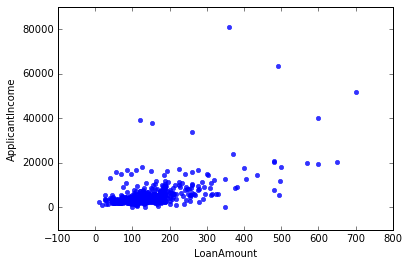

In [2504]:
sns.regplot(y='ApplicantIncome',x='LoanAmount',data=df,fit_reg=False)


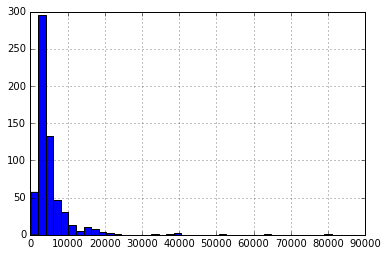

In [2505]:
df['ApplicantIncome'].hist(bins=40)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2b649bcfda0>],
 'caps': [<matplotlib.lines.Line2D at 0x2b649bd5dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b649be0da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b649bdce48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b649bcff28>,
  <matplotlib.lines.Line2D at 0x2b649bd5cc0>]}

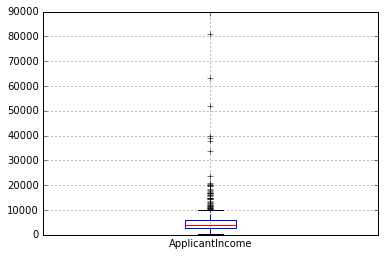

In [2506]:
df.boxplot(column = 'ApplicantIncome')


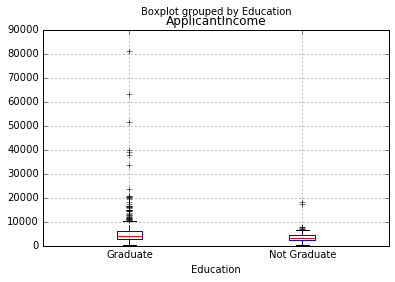

In [2507]:
df.boxplot(column='ApplicantIncome', by = 'Education')


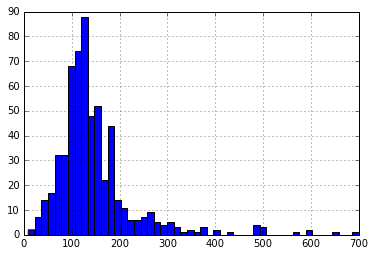

In [2508]:
df['LoanAmount'].hist(bins=50)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2b649debe80>],
 'caps': [<matplotlib.lines.Line2D at 0x2b649df2eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b649dfee80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b649df7f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b649df2668>,
  <matplotlib.lines.Line2D at 0x2b649df2da0>]}

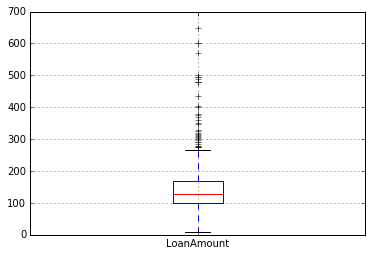

In [2509]:
df.boxplot(column ='LoanAmount' )


In [2510]:
temp1 = df['Credit_History'].value_counts(ascending= False)

 

In [2511]:
temp1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [2512]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [2513]:
temp2

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

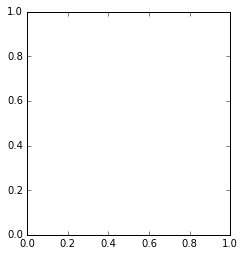

In [2514]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

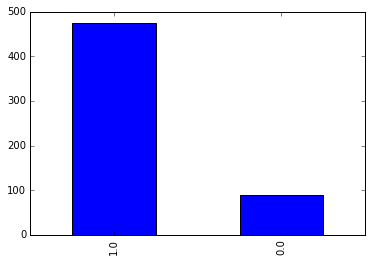

In [2515]:
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

Flushing oldest 200 entries.


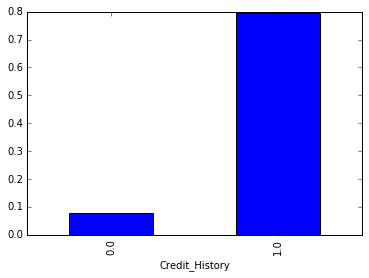

In [2516]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [2517]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])


In [2518]:
temp3


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


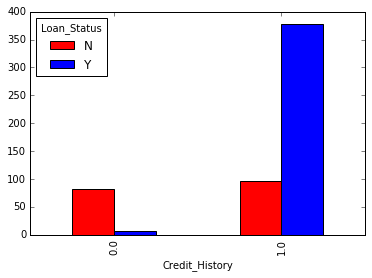

In [2519]:
temp3.plot(kind='bar', stacked=False, color=['red','blue'], grid=False)


In [2520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [2521]:
df.isnull().sum(axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [2522]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [2523]:
#for  i in range(614):
    #if df.loc[i, 'Dependents'] == '3+':
       # df.loc[i, 'Dependents'] = '3'

In [2524]:
#df['Dependents'].value_counts()

In [2525]:
#imp1 = Imputer(strategy = 'most_frequent')
#df[['Dependents']] = imp1.fit_transform(df[['Dependents']])

In [2526]:
#df['Dependents'].value_counts()

In [2527]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=  True)

In [2528]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


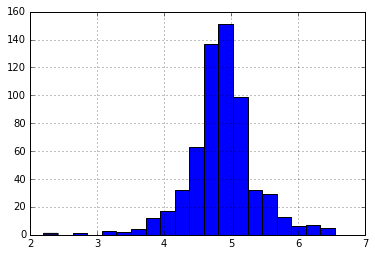

In [2529]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [2530]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first = True)
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [2531]:
df['Married']= pd.get_dummies(df['Married'],drop_first = True)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [2532]:
df['Education'] = pd.get_dummies(df['Education'],drop_first = True)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [2533]:
from sklearn.preprocessing import LabelEncoder  
    

In [2534]:
number = LabelEncoder()
df['Property_Area'] = number.fit_transform(df['Property_Area'])

In [2535]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,2,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,0,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,2,Y,4.189655
3,LP001006,1.0,1.0,0,1.0,No,2583,2358.0,120.0,360.0,1.0,2,Y,4.787492
4,LP001008,1.0,0.0,0,0.0,No,6000,0.0,141.0,360.0,1.0,2,Y,4.948760


In [2536]:
df['Property_Area'].value_counts()


1    233
2    202
0    179
Name: Property_Area, dtype: int64

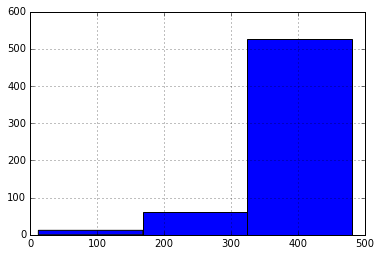

In [2537]:
df['Loan_Amount_Term'].hist(bins=3)


In [2538]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=  True)
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,2,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,0,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,2,Y,4.189655


In [2539]:
df.drop(['Loan_ID','Dependents'],axis = 1,inplace = True)



In [2540]:
df.head(5)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1.0,0.0,0.0,No,5849,0.0,128.0,360.0,1.0,2,Y,4.852030
1,1.0,1.0,0.0,No,4583,1508.0,128.0,360.0,1.0,0,N,4.852030
2,1.0,1.0,0.0,Yes,3000,0.0,66.0,360.0,1.0,2,Y,4.189655
3,1.0,1.0,1.0,No,2583,2358.0,120.0,360.0,1.0,2,Y,4.787492
4,1.0,0.0,0.0,No,6000,0.0,141.0,360.0,1.0,2,Y,4.948760


In [2541]:
df.isnull().sum(axis = 0)

Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

In [2542]:
df['Credit_History'].fillna( df['Loan_Status'],inplace= True)

In [2543]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Y       37
N       13
Name: Credit_History, dtype: int64

In [2544]:
def credit_his(k):
    if k == 'Y':
        return 1
    elif k == 'N':
        return 0
    else:
        return k

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null int64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 57.6+ KB


In [2545]:
df['Credit_History']=df['Credit_History'].apply(credit_his)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 57.6+ KB


In [2546]:
df['Credit_History'].value_counts()


1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [2547]:
#def emplyed(j):
    #if j == 'Yes':
        #return 1
    #if j == 'No':
        #return 0

In [2548]:
#df['Self_Employed']=df['Self_Employed'].apply(emplyed)  
#df['Self_Employed'].value_counts()


In [2549]:
#df['Self_Employed'].fillna( df['Credit_History'],inplace= True)

In [2550]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [2551]:
def loan(x):
    if x == 'Y':
        return 1
    if x == 'N':
        return 0
    
    

In [2552]:
df['Loan_Status']=df['Loan_Status'].apply(loan)  


In [2553]:
df.head(3) 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1.0,0.0,0.0,No,5849,0.0,128.0,360.0,1.0,2,1,4.852030
1,1.0,1.0,0.0,No,4583,1508.0,128.0,360.0,1.0,0,0,4.852030
2,1.0,1.0,0.0,Yes,3000,0.0,66.0,360.0,1.0,2,1,4.189655


In [2554]:
df['Self_Employed']=df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [2555]:
from sklearn.preprocessing import Imputer
imp1 = Imputer(strategy = 'most_frequent')
df[['Self_Employed']] = imp1.fit_transform(df[['Self_Employed']])

In [2556]:
df['Self_Employed'].value_counts()

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

In [2557]:
X=df.drop('Loan_Status',axis=1).values
y=df['Loan_Status'] 



In [2558]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log'],
      dtype='object')

In [2559]:
from sklearn.cross_validation import train_test_split
 


In [2560]:
 from sklearn.ensemble import  RandomForestClassifier as rfc


In [2561]:
 from sklearn.cross_validation import KFold


In [2562]:
 kf=KFold(X.shape[0] , n_folds=15,shuffle=True,random_state=1)


In [2563]:
for i,j in kf:
    X_train, X_test, y_train, y_test = X[i], X[j], y[i], y[j]
    
clf = rfc(n_estimators=40,criterion='entropy', max_features='log2')
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2564]:
#from sklearn.preprocessing import Imputer, StandardScaler
#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#X_test = ss.fit_transform(X_test)

In [2565]:
predictions_train= clf.predict(X_train) 

In [2566]:
predictions= clf.predict(X_test) 

In [2567]:
from sklearn.metrics import confusion_matrix



In [2568]:
# test
print(confusion_matrix(y_test,predictions))



[[ 7  4]
 [ 1 28]]


In [2569]:
clf.score(X_test, y_test)

0.875

In [2570]:
clf.score(X_train, y_train)

1.0

In [2571]:
df_test.isnull().sum(axis = 0)


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [2572]:
#for i in range(df_test.shape[0]):
    #if df_test.loc[i, 'Dependents'] == '3+':
        #df_test.loc[i, 'Dependents'] = 3
#df_test[['Dependents']] = imp1.fit_transform(df_test[['Dependents']])
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=  True)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['Gender']=pd.get_dummies(df_test['Gender'],drop_first = True)
df_test['Married']= pd.get_dummies(df_test['Married'],drop_first = True)
df_test['Education'] = pd.get_dummies(df_test['Education'],drop_first = True)
df_test['Property_Area'] = number.fit_transform(df_test['Property_Area'])
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=  True)
loan_id_test = df_test['Loan_ID']
df_test['Self_Employed']=df_test['Self_Employed'].map({'Yes': 1, 'No': 0})
df_test[['Self_Employed']] = imp1.fit_transform(df_test[['Self_Employed']])
df_test.drop(['Loan_ID','Dependents'],axis = 1,inplace = True)
df_test.isnull().sum(axis = 0)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
LoanAmount_log        0
dtype: int64

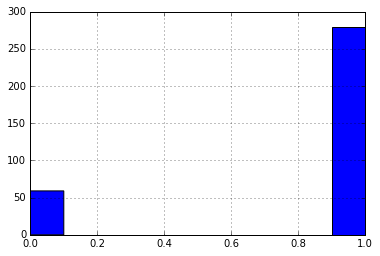

In [2573]:
df_test['Credit_History'].hist()

In [2574]:
df_test['Credit_History'].fillna(1, inplace=True)
  

In [2575]:
df_test.isnull().sum(axis = 0)


Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [2576]:
predictions_test= clf.predict(df_test)

In [2577]:
#Now using Gradient Boosting
#from sklearn.ensemble import GradientBoostingClassifier
#clf=GradientBoostingClassifier(n_estimators=100,max_depth=1)
#clf.fit(X_train,y_train)


In [2578]:
#clf.score(X_test, y_test)

In [2579]:
#from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
#rfc=  RandomForestClassifier(n_estimators=100)
#rfc.fit(X_train,y_train)
#rfc.score(X_test, y_test)

In [2580]:
#Bagging
#bg=BaggingClassifier(n_estimators=100)
#bg.fit(X_train,y_train)
#bg.score(X_test, y_test)

In [2581]:
#adb=AdaBoostClassifier(n_estimators=100)
#adb.fit(X_train,y_train)
#adb.score(X_test, y_test)

In [2582]:
df_result= pd.DataFrame()

df_result['Loan_ID']= loan_id_test
df_result['Loan_Status']= predictions_test 

df_result.head(5)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [2583]:
def loan_test(x):
    if x == 1:
        return 'Y'
    if x == 0:
        return 'N'
    

df_result['Loan_Status']=df_result['Loan_Status'].apply(loan_test)

In [2584]:
pd.DataFrame.to_csv(df_result,"filename1000.csv",index=False)
